In [2]:
# ---------------- Header ---------------------
import pandas as pd
import yt
import make_data as md
import pickle
from make_data import dataset
from matplotlib import pyplot as plt
import numpy as np
import os
import matplotlib.gridspec as gridspec
import re

#print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')

yt : [INFO     ] 2023-08-24 14:33:13,855 Parameters: current_time              = 0.049999999999996964
yt : [INFO     ] 2023-08-24 14:33:13,855 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-08-24 14:33:13,855 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-24 14:33:13,855 Parameters: domain_right_edge         = [4. 2. 1.]


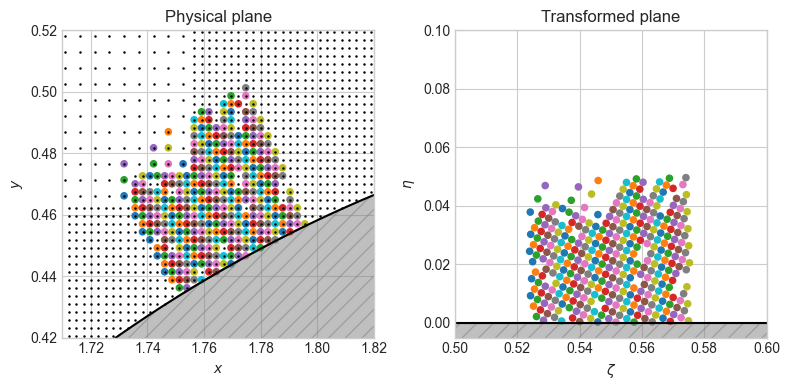

In [22]:
# ---------------- Transformation plot ---------------------
fig, ax = plt.subplots(1,2, figsize=(8,4))
dictname = 'Data/Constant_set/S1/'
ds = yt.load(dictname + 'plt/plt00010000/')
c0 = md.load_shape(dictname + 'shape', [2,0])
coordinates = c0[500:550]

distance = 0.05
n=50
m = 20
l = 2
mirror = False
# Distance is: points used at a distance normal to the surface [m] 
# n is number of zones in x, m is number of zones in y, l is number of zones away from the coordinate, points will be looked for 

# Transform to dataset
ad = ds.all_data()
AllData  = pd.DataFrame({'x':ad['x'], 'y':ad['y'], 'T':ad['nvtp'], 'I':ad['nvki']})

# Sort by a rectangle around the shape
dis = 0.2
maxx = max(coordinates[:,0])+dis
minx = min(coordinates[:,0])-dis
disx = maxx - minx
maxy = max(coordinates[:,1])+dis
miny = min(coordinates[:,1])-dis
disy = maxy - miny
Data = AllData[AllData['x']<maxx]
Data = Data[Data['x']>minx]
Data = Data[Data['y']<maxy]
Data = Data[Data['y']>miny]
Data = Data[Data['I']==0]
points = np.array([Data['x'],Data['y'],Data['T']]).T


# Map the remainer points into a grid
map = np.empty((n,m),dtype = list)
for i in range(n):
    for j in range(m):
        map[i,j] = []

# id in x is: (x-xmin) / disX * n
normpoints = (points - np.array([minx, miny, 0]) ) / np.array([disx/n, disy/m, 1])
for i, normpoint in enumerate(normpoints):
    ix = int(normpoint[0])
    iy = int(normpoint[1])
    map[ix,iy] += [i]
    
s = coordinates[0,2]
p_list = list()
for k in range(coordinates.shape[0]-1):
    
    co = coordinates[k,:2]
    ny = coordinates[k+1,:2] - co
    dis = np.linalg.norm(ny)
    ny = ny/dis
    nx = np.array([ny[1],-ny[0]]) if mirror else np.array([-ny[1],+ny[0]])

    # Find mapping close to
    normco = (co - np.array([minx, miny]) ) / np.array([disx/n, disy/m])
    ix = int(normco[0])
    iy = int(normco[1])

    # List all points within the grid close to the coordinate
    ip_list = list()
    for i in range(ix-l, ix+l+1):
        for j in range(iy-l, iy+l+1):
            ip_list += map[i,j]
    
    # Compute the normal distance and tangent distance for each point found
    print_list = list()
    for ip in ip_list:
        point = points[ip,]
        vec = point[:2] - co
        vecx = np.dot(vec, nx)
        vecy = np.dot(vec, ny)
        if vecx < distance and vecx > 0 and vecy < dis and vecy > 0:
            p_list.append(np.array([vecx, vecy+s, point[0], point[1], point[2]]))
        print_list.append(np.array([vecx, vecy+s, point[0], point[1], point[2], vecx < distance and vecx > 0 and vecy < dis and vecy > 0]))
    s+= dis

    print_list = np.array(print_list)
    ax[0].scatter(print_list[:,2], print_list[:,3],print_list[:,5]*20,c=f'C{k}')
    ax[0].plot(coordinates[k:k+2,0],coordinates[k:k+2,1], color=f'C{k}')
    ax[1].scatter(print_list[:,1], print_list[:,0],print_list[:,5]*20,c=f'C{k}')
    ax[1].plot(coordinates[k:k+2,2],[0.0,0.0], color=f'C{k}')
ax[0].scatter(points[:,0], points[:,1],0.6,c='k')

ax[0].fill_between(c0[:,0], c0[:,1],np.zeros_like(c0[:,0]), color='gray',alpha = 0.5, hatch='//')
ax[0].plot(c0[:,0], c0[:,1],'k')
ax[1].fill_between([0,1], [0,0],[-1,-1], color='gray',alpha = 0.5, hatch='//')
ax[1].plot([0,1], [0,0],'k')

ax[0].set_xlim(1.71,1.82)
ax[0].set_ylim(0.42, 0.52)
ax[1].set_xlim(0.5,0.6)
ax[1].set_ylim(-0.005, 0.1)
ax[0].set_title('Physical plane',fontsize=12)
ax[1].set_title('Transformed plane',fontsize=12)
ax[0].set_ylabel(f'$y$')
ax[0].set_xlabel(f'$x$')
ax[1].set_ylabel(f'$\eta $')
ax[1].set_xlabel(f'$\zeta $')
plt.tight_layout()

yt : [INFO     ] 2023-08-24 14:38:10,269 Parameters: current_time              = 0.10280000000011014
yt : [INFO     ] 2023-08-24 14:38:10,269 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-08-24 14:38:10,277 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-24 14:38:10,277 Parameters: domain_right_edge         = [4. 2. 1.]
yt : [INFO     ] 2023-08-24 14:39:35,117 Parameters: current_time              = 0.10320000000012164
yt : [INFO     ] 2023-08-24 14:39:35,117 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-08-24 14:39:35,117 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-24 14:39:35,117 Parameters: domain_right_edge         = [4. 2. 1.]
yt : [INFO     ] 2023-08-24 14:40:58,216 Parameters: current_time              = 0.10240000000009863
yt : [INFO     ] 2023-08-24 14:40:58,216 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-08-24 14:40:58,216 Parameters: 

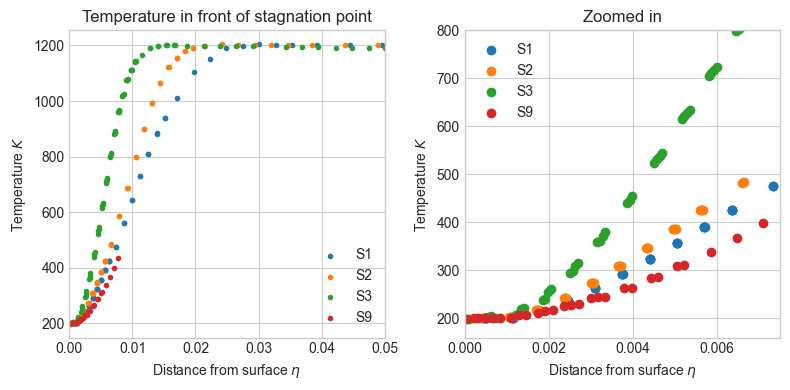

In [24]:
# ---------------- Data points scatter plot ---------------------
fig, ax = plt.subplots(1,2,figsize=(8,4))

def make_scatter(filename, pltname):
    coor = md.load_shape('Data/Constant_set/'+filename+'/shape', [2,0])
    ds = md.load_data('Data/Constant_set/'+filename+'/plt/'+ pltname)

    l = 0.12
    boundary = md.unfold(ds, coor,l)

    #y = 0.005
    x = 0.005
    r = 0.0023

    points = boundary[boundary[:,1]<x/2]
    #points = points[points[:,0]>r]
    ax[0].scatter(points[:,0],points[:,4],marker = '.',label=filename,)
    ax[1].scatter(points[:,0],points[:,4],marker = 'o',label=filename,)



make_scatter('S1', 'plt00034000') 
make_scatter('S2', 'plt00036000') 
make_scatter('S3', 'plt00032000')
make_scatter('S9', 'plt00030000')

ax[0].legend()
ax[1].legend()
ax[0].set_xlim(0,0.05)
ax[1].set_xlim(0,0.0075)
ax[1].set_ylim(160,800)
ax[0].set_xlabel(r'Distance from surface $\eta$',fontsize=10)
ax[1].set_xlabel(r'Distance from surface $\eta$',fontsize=10)
ax[0].set_ylabel(r'Temperature $K$',fontsize=10)
ax[1].set_ylabel(r'Temperature $K$',fontsize=10)
ax[0].set_title('Temperature in front of stagnation point', fontsize=12)
ax[1].set_title('Zoomed in', fontsize=12)
plt.tight_layout()

Text(0.5, 0, 'Distance along surface $\\zeta$')

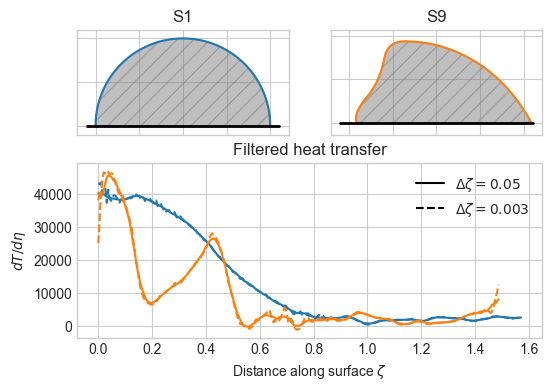

In [45]:
# ---------------- Filtering plot ---------------- 
fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(2,2, height_ratios=(3,5))
ax2 = plt.subplot(gs[1,:])
ax1 = plt.subplot(gs[0,0])
ax3 = plt.subplot(gs[0,1])
i = 1
i2 = 9
coor1 = md.load_shape(f'Data/Constant_set/S{i}/shape')
coor2 = md.load_shape(f'Data/Constant_set/S{i2}/shape')

ax1.fill_between(coor1[:,0], coor1[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.5, hatch='//')
ax1.plot(coor1[:,0],coor1[:,1], 'C0')
#ax1.plot(coor[:,0],coor[:,1], 'k', linewidth=1)
ax1.axis('equal')
ax1.plot([-0.55,0.55],[0,0], 'k', linewidth=2)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title(f'S{i}')

ax3.fill_between(coor2[:,0], coor2[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.5, hatch='//')
ax3.plot(coor2[:,0],coor2[:,1], 'C1')
#ax3.plot(coor2[:,0],coor2[:,1], 'k', linewidth=1)
ax3.axis('equal')
ax3.plot([-0.55,0.55],[0,0], 'k', linewidth=2)
ax3.set_title(f'S{i2}')
ax3.set_xticklabels([])
ax3.set_yticklabels([])

#ds1 = md.load_data('Data/Constant_set/S1/plt/plt00034000/')
#ds2 = md.load_data('Data/Constant_set/S9/plt/plt00030000/')

def make_scatter(filename, ds, x,c):
    coor = md.load_shape('Data/Constant_set/'+filename+'/shape', [2,0], num=1500)
    l = 0.02
    boundary = md.unfold(ds, coor,l, l=5)
    y = 0.004
    p = 1
    r = 0.002
    gradient = md.gradient_line(boundary, y, x, p, remove=r)

    ax2.plot(gradient[:,0],gradient[:,1],c)

make_scatter('S1', ds1, 0.003, '--C0') 
make_scatter('S1', ds1, 0.05, 'C0') 
make_scatter('S9', ds2, 0.003, '--C1')
make_scatter('S9', ds2, 0.05, 'C1')
ax2.plot([],[],'k', label=r'$\Delta\zeta=0.05$')
ax2.plot([],[],'--k', label=r'$\Delta\zeta=0.003$')

ax2.legend()
ax2.set_title('Filtered heat transfer')
ax2.set_ylabel(r'${dT}/{d\eta}$')
ax2.set_xlabel(r'Distance along surface $\zeta$')


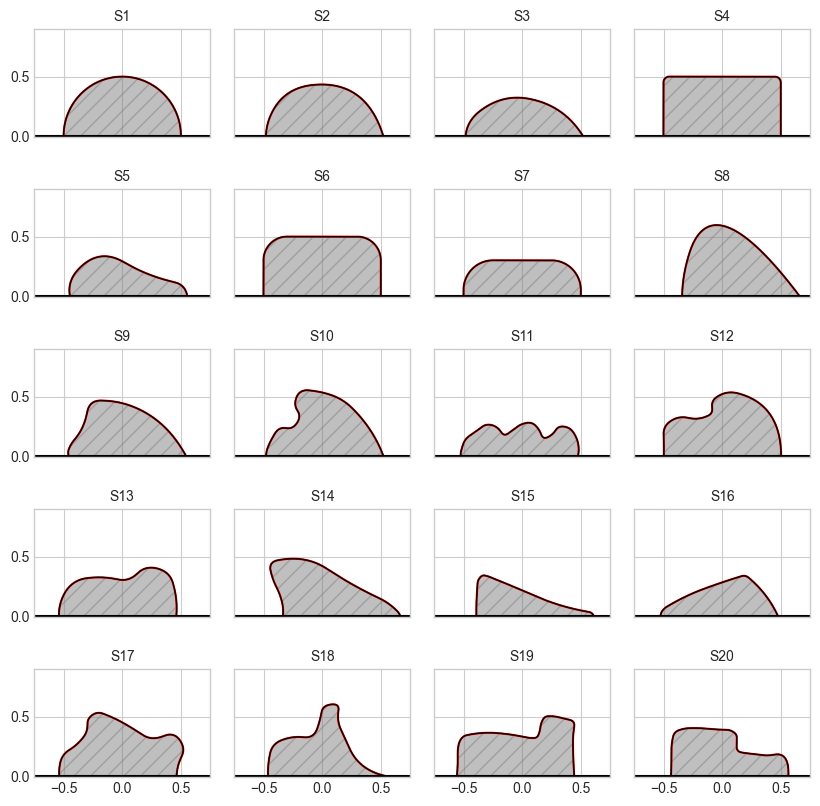

In [46]:
# ---------------- Shapes ---------------- 
fig, ax = plt.subplots(5,4, figsize=(8,8))

for i in range(20):
    name = f'S{(i+1)}'
    coor = md.load_shape('Shapes/'+name+'.geo',[0,0],1500)
    n = i//4
    m = i%4
    ax[n][m].plot(coor[:,0],coor[:,1],'r')
    ax[n][m].plot(coor[:,0],coor[:,1],'k',linewidth=1)
    ax[n][m].fill_between(coor[:,0],coor[:,1],np.zeros_like(coor[:,0]), color='gray',alpha = 0.5, hatch='//')
    ax[n][m].plot([-1,1],[0,0],'k')
    ax[n][m].set_xlim(-0.75,0.75)
    ax[n][m].set_ylim(-0.01, 0.9)
    ax[n][m].set_position([(m-1)*0.25, (4-n)*0.2, 0.22, 0.135])
    ax[n][m].set_title(name,fontsize=10)

    if i%4 != 0:
        ax[i//4][i%4].set_yticklabels([])
    if i//4 != 4:
        ax[i//4][i%4].set_xticklabels([])

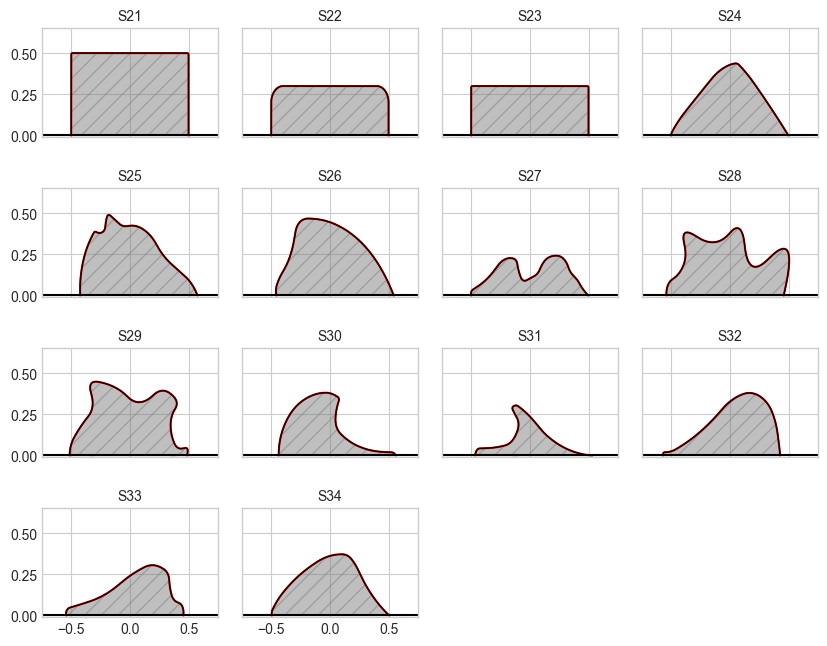

In [50]:
# ---------------- Shapes rest ---------------- 


n = 14
l = 21
fig = plt.figure(figsize=(8, 8*4/5))
gs = gridspec.GridSpec((n+3)//4,4)
for i in range(n):
    file = f'Data/Constant_set/S{i+l}/shape'
    coor = md.load_shape(file,[0,0],1500)
    n = i//4
    m = i%4
    ax1 = plt.subplot(gs[i])
    ax1.plot(coor[:,0],coor[:,1],'r')
    ax1.plot(coor[:,0],coor[:,1],'k',linewidth=1)
    ax1.fill_between(coor[:,0],coor[:,1],np.zeros_like(coor[:,0]), color='gray',alpha = 0.5, hatch='//')
    ax1.plot([-1,1],[0,0],'k')
    ax1.set_xlim(-0.75,0.75)
    ax1.set_ylim(-0.01, 0.65)
    ax1.set_position([(m-1)*0.25, (4-n)*0.25, 0.22, 0.17])
    #ax1.set_aspect('equal', adjustable = 'box')
    tname = f'S{i+l}'
    #tname = f'Shape {i+1}'
    ax1.set_title(tname,fontsize=10)

    if i%4 != 0:
        ax1.set_yticklabels([])
    if i//4 != 3:
        ax1.set_xticklabels([])


yt : [INFO     ] 2023-09-05 15:03:12,071 Parameters: current_time              = 0.10280000000011014
yt : [INFO     ] 2023-09-05 15:03:12,072 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-09-05 15:03:12,073 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-09-05 15:03:12,073 Parameters: domain_right_edge         = [4. 2. 1.]
yt : [INFO     ] 2023-09-05 15:03:24,409 Parameters: current_time              = 0.10320000000012164
yt : [INFO     ] 2023-09-05 15:03:24,411 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-09-05 15:03:24,414 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-09-05 15:03:24,416 Parameters: domain_right_edge         = [4. 2. 1.]
yt : [INFO     ] 2023-09-05 15:03:38,257 Parameters: current_time              = 0.10240000000009863
yt : [INFO     ] 2023-09-05 15:03:38,273 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-09-05 15:03:38,273 Parameters: 

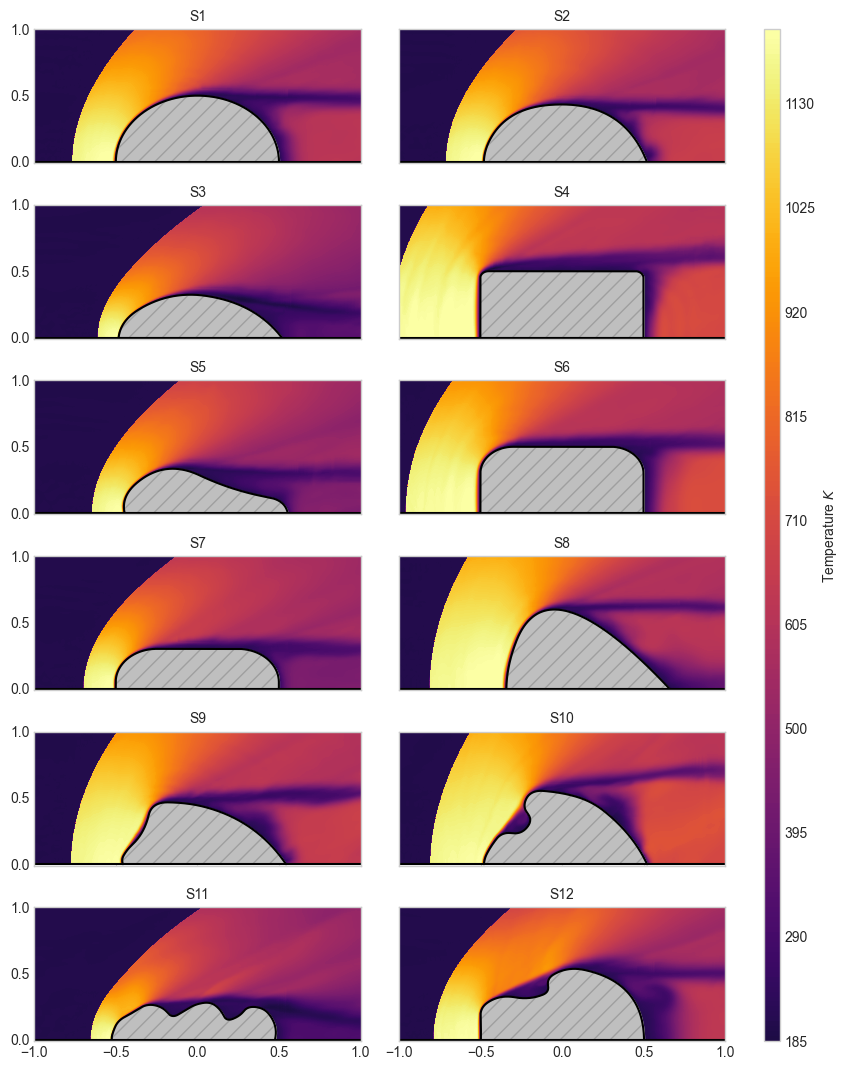

In [3]:
# ----------------------- Temperature fields ------------------------------- 
n = 12
s = 1
M = 2
N = n//M
fig = plt.figure(figsize=(8,9/5*N))
gs = gridspec.GridSpec(N,M+1, width_ratios=[1, 1, 0.05])  # 5 rows, 3 columns


for i in range(n):
    folder = f'Data/Constant_set/S{i+s}'
    plts = [dir for dir in os.listdir(folder+'/plt') if os.path.isdir(folder + '/plt/' + dir)]
    val = 0
    for plt1 in plts:
        val1 = float(plt1[3:])
        if val1 > val:
            val = val1
            subfolder = plt1

    n = i//M
    m = i%M
    ax = plt.subplot(gs[n,m])
    

    ds = md.load_data(folder+'/plt/'+subfolder)
    sd = ds.all_data()
    x = np.array(sd['x'])-2
    y = np.array(sd['y'])
    T = np.array(sd['nvtp'])
    sc = ax.tricontourf(x,y,T, cmap='inferno', levels=250, vmin=50, vmax=1200)

    coor = md.load_shape(folder+'/shape',[0,0],num=1500)
    ax.plot(coor[:,0],coor[:,1],'k')
    ax.fill_between(coor[:,0],coor[:,1],np.zeros_like(coor[:,0]), color='white',alpha = 1)
    ax.fill_between(coor[:,0],coor[:,1],np.zeros_like(coor[:,0]), color='gray',alpha = 0.5, hatch='//')
    ax.plot([-1,1],[0,0],'k')

    ax.set_xlim(-1,1)
    ax.set_ylim(-0.01, 1)
    ax.set_title(f'S{i+s}',fontsize=10)

    if i%M != 0:
        ax.set_yticklabels([])
    if i//M != N-1:
        ax.set_xticklabels([])


plt.tight_layout()
plt.gca().set_axisbelow(True)
cax = plt.subplot(gs[:, 2])
cbar = plt.colorbar(sc, cax=cax)
cbar.set_label('Temperature $K$')

yt : [INFO     ] 2023-09-05 15:02:52,902 Parameters: current_time              = 0.10280000000011014
yt : [INFO     ] 2023-09-05 15:02:52,903 Parameters: domain_dimensions         = [96 48  1]
yt : [INFO     ] 2023-09-05 15:02:52,903 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-09-05 15:02:52,907 Parameters: domain_right_edge         = [4. 2. 1.]


KeyboardInterrupt: 

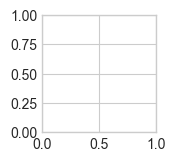

In [2]:
# ----------------------- Temperature fields presentation ------------------------------- 
n = 32
s = 1
M = 8
N = n//M
fig = plt.figure(figsize=(14,7))
gs = gridspec.GridSpec(N,M+1, width_ratios=[1, 1, 1, 1, 1,1,1,1, 0.05])  # 5 rows, 3 columns


for i in range(n):
    folder = f'Data/Constant_set/S{i+s}'
    plts = [dir for dir in os.listdir(folder+'/plt') if os.path.isdir(folder + '/plt/' + dir)]
    val = 0
    for plt1 in plts:
        val1 = float(plt1[3:])
        if val1 > val:
            val = val1
            subfolder = plt1

    n = i//M
    m = i%M
    ax = plt.subplot(gs[n,m])
    

    ds = md.load_data(folder+'/plt/'+subfolder)
    sd = ds.all_data()
    x = np.array(sd['x'])-2
    y = np.array(sd['y'])
    T = np.array(sd['nvtp'])
    sc = ax.tricontourf(x,y,T, cmap='inferno', levels=250, vmin=50, vmax=1200)

    coor = md.load_shape(folder+'/shape',[0,0],num=1500)
    ax.plot(coor[:,0],coor[:,1],'k')
    ax.fill_between(coor[:,0],coor[:,1],np.zeros_like(coor[:,0]), color='white',alpha = 1)
    ax.fill_between(coor[:,0],coor[:,1],np.zeros_like(coor[:,0]), color='gray',alpha = 0.5, hatch='//')
    ax.plot([-1,1],[0,0],'k')

    ax.set_xlim(-1,1)
    ax.set_ylim(-0.01, 1.5)
    ax.set_aspect('equal',adjustable='box')
    ax.set_title(f'S{i+s}',fontsize=10)

    if i%M != 0:
        ax.set_yticklabels([])
    if i//M != N-1:
        
        ax.set_xticklabels([])


plt.tight_layout()
plt.gca().set_axisbelow(True)
cax = plt.subplot(gs[:, 8])
cbar = plt.colorbar(sc, cax=cax)
cbar.set_label('Temperature $K$')

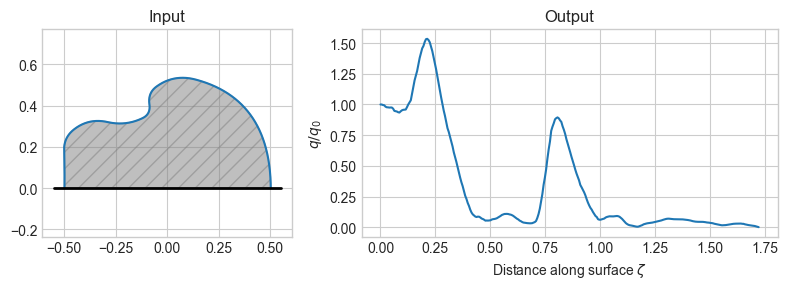

In [2]:
# ------------------------- NN Objective ------------------------

fig = plt.figure(figsize=(8, 3))
gs = gridspec.GridSpec(1,2, width_ratios=(3,5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
i = 12


coor = md.load_shape(f'Data/Constant_set/S{i}/shape',np.array([0,0]))
output = np.load(f'Data/Constant_set/S{i}.npy')
ax2.plot(output[:,0], output[:,1]/output[0,1], 'C0')
ax2.set_title('Output')
ax2.set_ylabel(r'${q}/{q_0}$')
ax2.set_xlabel(r'Distance along surface $\zeta$')
ax1.fill_between(coor[:,0], coor[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.5, hatch='//')
ax1.plot(coor[:,0],coor[:,1], 'C0')
ax1.axis('equal')
ax1.plot([-0.55,0.55],[0,0], 'k', linewidth=2)
#ax1.set_ylim(-0.005,0.5)
#ax1.set_xlim(-0.85,0.65)
ax1.set_title('Input')
plt.tight_layout()


c:\Users\chris\OneDrive - Imperial College London\Hypersonic\make_data.py:204: RankWarning: Polyfit may be poorly conditioned
  c = curvature(coordinate, y, dis_tangent, degree)
c:\Users\chris\OneDrive - Imperial College London\Hypersonic\make_data.py:204: RankWarning: Polyfit may be poorly conditioned
  c = curvature(coordinate, y, dis_tangent, degree)


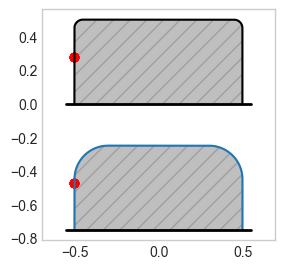

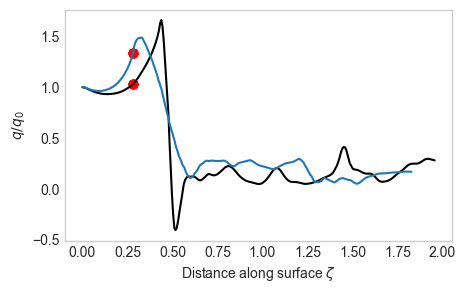

In [160]:
# ------------------------- Presentations ------------------------

fig1, ax1 = plt.subplots(figsize=(3, 3))
fig2, ax2 = plt.subplots(figsize=(5, 3))
i1 = 4
i2 = 6

coor = md.load_shape(f'Data/Constant_set/S{i1}/shape',np.array([0,0]))
coor2 = md.load_shape(f'Data/Constant_set/S{i2}/shape',np.array([-0,-0.75]))
output = np.load(f'Data/Constant_set/S{i1}.npy')
output2 = np.load(f'Data/Constant_set/S{i2}.npy')
ax2.plot(output[:,0], output[:,1]/output[0,1], 'k')
ax2.plot(output2[:,0], output2[:,1]/output2[0,1], 'C0')
ax2.set_ylabel(r'${q}/{q_0}$')
ax2.set_xlabel(r'Distance along surface $\zeta$')
ax1.fill_between(coor[:,0], coor[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.5, hatch='//')
ax1.plot(coor[:,0],coor[:,1], 'k')
ax1.plot(coor2[:,0],coor2[:,1], 'C0')
ax1.fill_between(coor2[:,0], coor2[:,1],np.ones_like(coor[:,0])*-.75,color='gray',alpha = 0.5, hatch='//')
ax1.axis('equal')
ax1.plot([-0.55,0.55],[0,0], 'k', linewidth=2)
ax1.plot([-0.55,0.55],[-.75,-.75], 'k', linewidth=2)
#plt.tight_layout()
curv = md.curvature_line(coor, 0.01, 3, 500)
curv2 = md.curvature_line(coor2, 0.01, 3, 500)
d_tot = coor[-1,2]
y = 0
c = 'k'
r_d = 1.5
dy = 0.18
yd = dy
while y < d_tot:
    point = np.array([ 
            np.interp(y, coor[:,2], coor[:,0]),
            np.interp(y, coor[:,2], coor[:,1])
            ])
    #ax1.scatter(point[0], point[1], color=c)
    h = np.interp(y, output[:,0], output[:,1]/output[0,1])
    #ax2.scatter(y, h, color=c)
    s = 0.28
    sd = -0.0
    sx = np.interp(s+sd,coor2[:,2],coor2[:,0])
    sy = np.interp(s+sd,coor2[:,2],coor2[:,1])
    fx = np.interp(s,coor[:,2],coor[:,0])
    fy = np.interp(s,coor[:,2],coor[:,1])
    sh = np.interp(s+sd,output[:,0],output[:,1]/output[0,1])
    fh = np.interp(s,output2[:,0],output2[:,1]/output2[0,1])
    ax1.scatter(sx,sy, c='r',alpha = 0.5)
    ax1.scatter(fx,fy, c='r', alpha = 0.5)
    ax2.scatter(s,fh, c='r', alpha = 0.5)
    ax2.scatter(s,sh, c='r', alpha = 0.5)
    # ax2.plot(curv[:,0], curv[:,2], ':C1')
    # ax2.plot(curv2[:,0], curv2[:,2],':C1')
    # ax2.plot(curv[:,0], curv[:,3], '--C2')
    # ax2.plot(curv2[:,0], curv2[:,3], '--C2')

    dr = min( md.distance_angle(curv, y, [r_d, -r_d]) )
    c = 'k'
    if dr/2 < dy:
        yd = dr/2
        c = 'r'
    y += yd
    if dy < dr/2:
        yd = dy

ax1.grid()
ax2.grid()

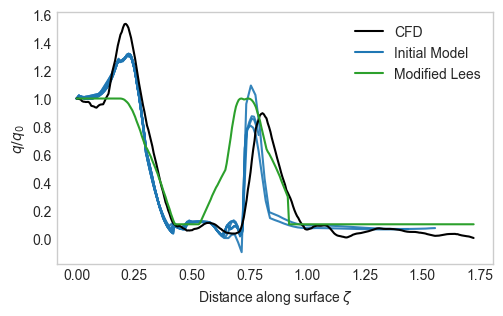

In [161]:
# ---------------------------- initial model result -------------------------------------
# ---------------------------- load model -----------------------------------------
import tensorflow as tf

structure = [0,1,2,3,4]
test_id1 = [3, 5, 12, 17]
test_id2 = [2, 11, 20, 26]
test_id3 = [4, 16, 22, 30]
tests = [*test_id1, *test_id2,*test_id3]
tests.sort()
plttest = [12]
n = len(plttest)
fig2, ax2 = plt.subplots(figsize=(5, 3))

model  = tf.keras.models.load_model('MachineLearning/Initial_model.h5')

with open('MachineLearning/training_data', 'rb') as file:
    data_set = pickle.load(file)

L1_error = list()
Linf_error = list()
Lee_L1 = list()
Lee_Linf = list()
Det_L1 = list()
Det_Linf = list()
for set in data_set:
    if set.shape == 14: continue
    if set.shape in tests:
        y = model.predict(set.input[:,structure].reshape([1,80,5]), verbose=0)

        if set.shape in plttest:
            ax2.plot(set.input[:,0],[1,*y[0,:]], 'C0', alpha = 0.9)


for test in plttest:
    j = plttest.index(test)
    if test == 20:
        test = 34
        
    filename = f'Data/Constant_set/S{test}'
    outputs = np.load(filename+'.npy')
    ax2.plot(outputs[:,0], outputs[:,1]/outputs[0,1], 'k', label = 'CFD')
    ax2.set_xlabel('')
    coor = md.load_shape(filename+'/shape')
    plt.tight_layout()
    curv = md.curvature_line(coor,0.01,2,300)
    a = curv[:,2]
    a[a>np.pi/2] = np.pi/2
    a[160:] = np.pi/2
    a[a<-0.3] = np.pi/2
    c = 0.1 + 0.9 * np.cos(a)
    ax2.plot([],[],'C0', label = 'Initial Model')
    ax2.plot(curv[:,0], c[:], 'C2', label = 'Modified Lees')
    #ax2.plot(curv[:,0], d[:], 'C1', label = 'Detra & Hidalgo')
    ax2.set_ylabel(r'${q}/{q_0}$')
    ax2.set_xlabel(r'Distance along surface $\zeta$')
    ax2.legend() 
    #ax2.set_xlim(-0.01,1)


# lines, labels = fig.axes[0].get_legend_handles_labels()
# fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0)) 
ax2.grid()

Pa 0.012682409401902683 [-0.49783746  0.10039628  0.10039924]
2.115358065412974
8.731646668669793
7.643506593667297
5.292027994108397
-1.8084145294646103


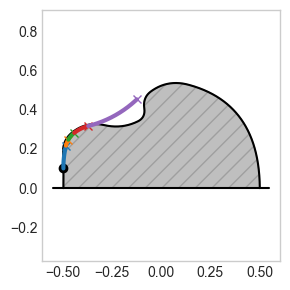

In [152]:
# ---------------------------- Shape information -----------------------
def plot_curv(coor, d, ang,num, ax):
    ax.plot(coor[:,0],coor[:,1], 'k')
    ax.fill_between(coor[:,0],coor[:,1],np.zeros_like(coor[:,0]), color='gray',alpha = 0.5, hatch='//')
    ax.plot([-0.55,0.55],[0,0],'k')
    #ax.axis('equal')
    curv = md.curvature_line(coor, 0.01,1,200)
    p = coor[coor[:,2]> d ][0]
    ax.plot(p[0],p[1],'ok')
    pa = -md.curvature(coor, p[2],0.01,1)[1] + np.pi/2
    
    dy = 0
    k0 = 0
    print('Pa',pa-np.pi/2, p)
    for i in range(num):
        d0 = md.distance_angle(curv, d + dy, [-ang,ang])
        if d0.min() > 1e5: break
        dy += d0.min()

        if d0[0] < d0[1]:
            k = -ang/d0[0]
        else:
            k = ang/d0[1]
        print(k)
        n = int(1000*ang/abs(k))
        cp = np.zeros((n,2))
        cp[0] = p[:2]
        dx  = 0.001
        a0 = pa
        k0 += k
        for j in range(1,n):
            a0 -= k * dx
            cp[j] = cp[j-1] + np.array([np.cos(a0), np.sin(a0)])*dx

        ax.plot(cp[:,0], cp[:,1], c=f'C{i}', linewidth=3)
        p = cp[-1]
        ax.plot(p[0],p[1],'x',c=f'C{i}')
        
        pa  = -md.curvature(coor, d+dy,0.01,1)[1] + np.pi/2
        ang *= 1.2

    ax.set_xlim(-0.65,0.65)
    ax.set_ylim(-0.005, 0.65)


fig, ax = plt.subplots(figsize=(3,3))
coor = md.load_shape('Shapes/S12.geo',[0,0],1500)

d = 0.1
ang = 1/4#np.pi/7
n = 5
plot_curv(coor, d, ang, n, ax)
ax.axis('equal')
ax.grid()
plt.tight_layout()

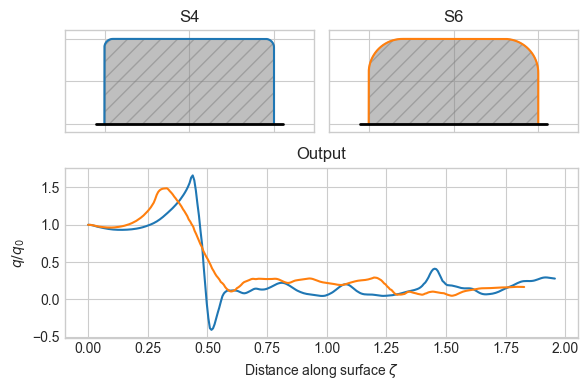

In [33]:
# ------------------------- Square shape example ------------------------

fig = plt.figure(figsize=(6, 4))
gs = gridspec.GridSpec(2,2, height_ratios=(3,5))
ax2 = plt.subplot(gs[1,:])
ax1 = plt.subplot(gs[0,0])
ax3 = plt.subplot(gs[0,1])
i = 4
i2 = 6
coor1 = md.load_shape(f'Data/Constant_set/S{i}/shape')
coor2 = md.load_shape(f'Data/Constant_set/S{i2}/shape')

output1 = np.load(f'Data/Constant_set/S{i}.npy')
output2 = np.load(f'Data/Constant_set/S{i2}.npy')
ax2.plot(output1[:,0], output1[:,1]/output1[0,1], 'C0',label=f'S{i}')
ax2.plot(output2[:,0], output2[:,1]/output2[0,1], 'C1',label=f'S{i}')
ax2.set_title('Output')
ax2.set_ylabel(r'${q}/{q_0}$')
ax2.set_xlabel(r'Distance along surface $\zeta$')


ax1.fill_between(coor1[:,0], coor1[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.5, hatch='//')
ax1.plot(coor1[:,0],coor1[:,1], 'C0')
#ax1.plot(coor[:,0],coor[:,1], 'k', linewidth=1)
ax1.axis('equal')
ax1.plot([-0.55,0.55],[0,0], 'k', linewidth=2)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax3.fill_between(coor2[:,0], coor2[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.5, hatch='//')
ax3.plot(coor2[:,0],coor2[:,1], 'C1')
#ax3.plot(coor2[:,0],coor2[:,1], 'k', linewidth=1)
ax3.axis('equal')
ax3.plot([-0.55,0.55],[0,0], 'k', linewidth=2)
ax3.set_title(f'S{i2}')
ax3.set_xticklabels([])
ax3.set_yticklabels([])


ax1.set_title(f'S{i}')
plt.tight_layout()


Pa -0.20224395668542194 [-0.48974741  0.0999207   0.10059801]
2.0010972197660664
2.0057569002477873
1.9981639416525894
2.000527007562167
1.9989765515308464
Pa 0.0 [-0.50116706  0.10102041  0.10102041]
0.6900491439779568
19.59808985646793
19.852581136622863
20.07945242223974
0.5601703580886576
Pa 0.012682409401902683 [-0.49783746  0.10039628  0.10039924]
2.115358065412974
8.731646668669793
7.643506593667297
5.292027994108397
-1.8084145294646103
Pa -0.10316422037751916 [-0.45866898  0.10097427  0.10111563]
2.1952344555486665
6.81772115984944
6.7918649467969505
3.2594288076750675
-2.936932371537891


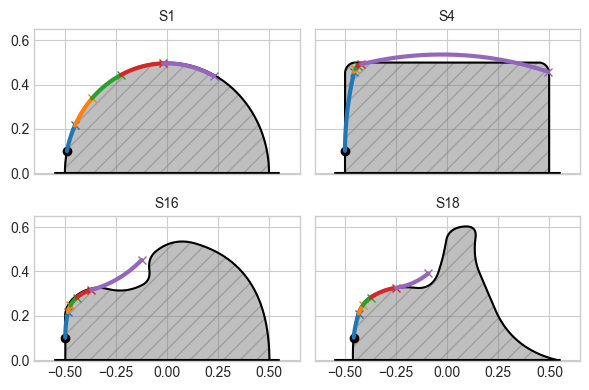

In [147]:
# ---------------------------- Shape information -----------------------
def plot_curv(coor, d, ang,num, ax):
    ax.plot(coor[:,0],coor[:,1], 'k')
    ax.fill_between(coor[:,0],coor[:,1],np.zeros_like(coor[:,0]), color='gray',alpha = 0.5, hatch='//')
    ax.plot([-0.55,0.55],[0,0],'k')
    #ax.axis('equal')
    curv = md.curvature_line(coor, 0.01,1,200)
    p = coor[coor[:,2]> d ][0]
    ax.plot(p[0],p[1],'ok')
    pa = -md.curvature(coor, p[2],0.01,1)[1] + np.pi/2
    
    dy = 0
    k0 = 0
    print('Pa',pa-np.pi/2, p)
    for i in range(num):
        d0 = md.distance_angle(curv, d + dy, [-ang,ang])
        if d0.min() > 1e5: break
        dy += d0.min()

        if d0[0] < d0[1]:
            k = -ang/d0[0]
        else:
            k = ang/d0[1]
        print(k)
        n = int(1000*ang/abs(k))
        cp = np.zeros((n,2))
        cp[0] = p[:2]
        dx  = 0.001
        a0 = pa
        k0 += k
        for j in range(1,n):
            a0 -= k * dx
            cp[j] = cp[j-1] + np.array([np.cos(a0), np.sin(a0)])*dx

        ax.plot(cp[:,0], cp[:,1], c=f'C{i}', linewidth=3)
        p = cp[-1]
        ax.plot(p[0],p[1],'x',c=f'C{i}')
        
        pa  = -md.curvature(coor, d+dy,0.01,1)[1] + np.pi/2
        ang *= 1.2

    ax.set_xlim(-0.65,0.65)
    ax.set_ylim(-0.005, 0.65)

fig, ax = plt.subplots(2,2,figsize=(6,4))
coor = md.load_shape('Shapes/S1.geo',[0,0],1500)
coor2 = md.load_shape('Shapes/S4.geo',[0,0],1500)
coor3 = md.load_shape('Shapes/S12.geo',[0,0],1500)
coor4 = md.load_shape('Shapes/S18.geo',[0,0],1500)

d = 0.1
ang = 1/4#np.pi/7
n = 5
plot_curv(coor, d, ang, n, ax[0][0])
plot_curv(coor2, d, ang, n, ax[0][1])
plot_curv(coor3, d, ang, n, ax[1][0])
plot_curv(coor4, d, ang, n, ax[1][1])
ax[0][0].set_title('S1',fontsize=10)
ax[0][0].set_xticklabels([]);
ax[0][1].set_xticklabels([]);
ax[0][1].set_yticklabels([]);
ax[1][1].set_yticklabels([]);
ax[0][1].set_title('S4',fontsize=10)
ax[1][0].set_title('S16',fontsize=10)
ax[1][1].set_title('S18',fontsize=10)

plt.tight_layout()

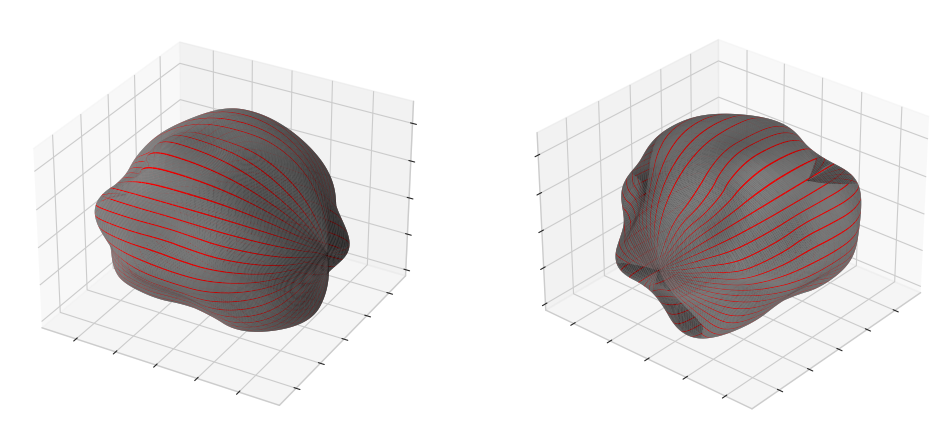

In [72]:
# ----------------------- 3D projection ------------------------------
coor = [md.load_shape('Shapes/S1.geo'),md.load_shape('Shapes/S13.geo',[0.038,0]),md.load_shape('Shapes/S10.geo',[-0.023,0])]
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])
ax3d = fig.add_subplot(gs[0],projection='3d')
ax3d2 = fig.add_subplot(gs[1],projection='3d')
co = list()
l_p = 50
x_new = np.linspace(-0.5,0.5,l_p)

for i in range(3):
    r_new = np.interp(x_new, coor[0][:,0], coor[0][:,1])
    co.append( np.array([x_new, r_new]).T )

co = coor

theta = np.linspace(0,2*np.pi, 500)
for j in range(1,len(theta)):
    t = np.array([theta[j-1], theta[j]])

    a = 0.7 - np.sin(t)/5 + np.sin(t*4)/3
    b = 0.3 - np.cos(t)/4 + np.cos(t*6)/8
    c = 1 - a - b
    coord0 = co[0] * a[0] + co[1] * b[0] + co[2] * c[0]
    coord1 = co[0] * a[1] + co[1] * b[1] + co[2] * c[1]
    x = np.array([coord0[:,0], coord1[:,0]])
    y = np.array([np.sin(t[0]) * coord0[:,1], np.sin(t[1]) * coord1[:,1] ])
    z = np.array([np.cos(t[0]) * coord0[:,1], np.cos(t[1]) * coord1[:,1] ])
    
    c= 'gray'
    if not j%10:
        c = 'r'
    ax3d.plot_surface(x,y,z,color=c, alpha = 1)
    ax3d2.plot_surface(x,y,z,color=c, alpha = 1)

ax3d2.view_init(elev=30, azim=220)
ax3d.set_xticklabels([])
ax3d.set_yticklabels([])
ax3d.set_zticklabels([])
ax3d2.set_xticklabels([])
ax3d2.set_yticklabels([])
ax3d2.set_zticklabels([]);
    

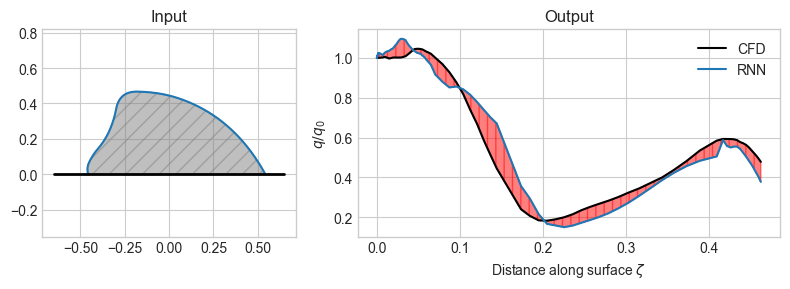

In [49]:
# -------------- loss function ------------------------
import pickle
filename = 'MachineLearning/outputs_003/001,Test20elu,20elu,_20elu,20elu,0123'

with open(filename, 'rb') as file:
        res_sets = pickle.load(file)

set = res_sets[2][10]

coor = md.load_shape(f'Shapes/S{set.shape}.geo', np.array([0,0]))

fig = plt.figure(figsize=(8, 3))
gs = gridspec.GridSpec(1,2, width_ratios=(3,5))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax1.fill_between(coor[:,0], coor[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.5, hatch='//')
ax1.plot(coor[:,0],coor[:,1], 'C0')

ax1.plot([-0.65,0.65],[0,0], 'k', linewidth=2)
ax1.axis('equal')
toggle = True
ax2.plot(set.input[:,0], set.output, 'k', label = 'CFD')
ax2.plot(set.input[:,0], [1, *set.predict], label = 'RNN')
ax2.fill_between(set.input[:,0], set.output, [1, *set.predict], color='red',alpha = 0.5, hatch='||')
#ax2.fill_between(set.input[:,0], set.output, np.zeros_like(set.output), color='gray',alpha = 0.3, hatch='x', label = 'Area')
ax1.set_title('Input')
ax2.set_title('Output')
ax2.set_ylabel(r'${q}/{q_0}$')
ax2.set_xlabel(r'Distance along surface $\zeta$')
ax2.legend()
plt.tight_layout()

In [132]:
# -------------------- Make input ------------------------
def make_input(coor, dy, r_d, angle):
    # 200
    input_list = list()
    d_tot = coor[-1,2]
    
    curv = md.curvature_line(coor,0.01,1,500)
    for i in range(1,len(curv)):
        if curv[i,2] < curv[i-1,2] - 3:
            curv[i,2] += np.pi*2
            
    y = 0
    yd = dy
    a0 = 0
    
    while y < d_tot:
        yadd = 0
        ang = angle
        dis = np.zeros(6)
        for i in range(6):
            if y+yadd > d_tot:
                dis[i] = 1e6
                continue

            distance = md.distance_angle(curv, y + yadd, [-ang, ang])
            if distance[0] < distance[1]:
                dis[i] = - distance[0]
                
            else:
                dis[i] = distance[1]

            yadd += distance.min()
            ang *= 1.2

        curvature = md.curvature(coor, y, 0.01,1)[1:] # outputs aoa and curvature
        curvature[1] = curvature[1]/10 #np.sign(curvature[1]) * abs(curvature[1])**0.5 / 10
        input_list.append([y, yd, *curvature, *0.025/dis])#*(np.sign(dis)*abs(dis)**-0.5/10)])  #0.25 * 0.1

        # Interpolate coordinates
        dr = min( md.distance_angle(curv, y, [r_d, -r_d]) )
        if dr/2 < dy:
            yd = dr/2
        y += yd
        if dy < dr/2:
            yd = dy

    inputs = np.array(input_list)
    for i in range(1,len(inputs)):
        if inputs[i,2] < inputs[i-1,2] - 3:
            inputs[i,2] += np.pi*2
    
    return inputs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


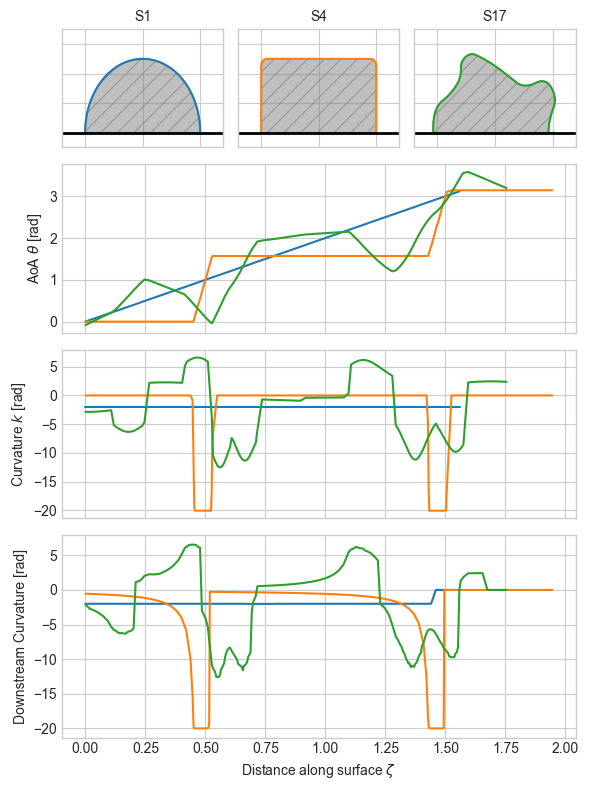

In [25]:
# --------------------- Plot inputs ----------------------
fig = plt.figure(figsize=(6,8))
gs = gridspec.GridSpec(4,3, width_ratios=(1,1,1), height_ratios=(0.7,1,1,1.2))

ax2 = plt.subplot(gs[1,:])
ax3 = plt.subplot(gs[2,:])
ax4 = plt.subplot(gs[3,:])
# The constant case.    
for i, shape in enumerate([1,4,17]):

        ax1 = plt.subplot(gs[0,i])
        coor = md.load_shape(f'Shapes/S{shape}.geo')
        ax1.fill_between(coor[:,0], coor[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.5, hatch='//')
        ax1.plot(coor[:,0],coor[:,1], f'C{i}')
        #ax1.plot(coor[:,0],coor[:,1], 'k', linewidth=1)
        ax1.plot([-0.75,0.75],[0,0], 'k', linewidth=2)
        ax1.set_xlim(-0.7,0.7)
        ax1.set_ylim(-0.1,0.7)
        ax1.set_title(f'S{shape}',fontsize=10)
        ax1.set_yticklabels([])
        ax1.set_xticklabels([])

        input = make_input(coor, 0.02, 0.1, 1/4)
        
        #ax3.set_title(r'Curvature',fontsize=10)
        ax3.plot(input[:,0], input[:,3]*10, label=f'S{shape}')
        #ax2.set_title(r'AoA',fontsize=10)
        ax2.plot(input[:,0], input[:,2], label=f'S{shape}')
        #ax4.set_title(r'Downstream Curvature',fontsize=10)
        ax4.plot(input[:,0], -input[:,4]*10, f'C{i}')
        #ax4.plot(input[:,0], -input[:,5]*10, f'C{i}--')
        #ax4.plot(input[:,0], -input[:,6]*10, f'C{i}:')


#ax4.plot([],[],'k',label=r'$k1$')
#ax4.plot([],[],'k--',label=r'$k2$')
#ax4.plot([],[],'k:',label=r'$k3$')
ax4.legend()
ax2.set_ylabel(r'AoA $\theta$ [rad]')
ax2.set_xticklabels([])
ax3.set_ylabel(r'Curvature $k$ [rad]')
ax3.set_xticklabels([])
ax4.set_ylabel(r'Downstream Curvature [rad]')
ax4.set_xlabel(r'Distance along surface $\zeta$')
plt.tight_layout()

c:\Users\chris\OneDrive - Imperial College London\Hypersonic\make_data.py:204: RankWarning: Polyfit may be poorly conditioned
  c = curvature(coordinate, y, dis_tangent, degree)
c:\Users\chris\OneDrive - Imperial College London\Hypersonic\make_data.py:204: RankWarning: Polyfit may be poorly conditioned
  c = curvature(coordinate, y, dis_tangent, degree)
c:\Users\chris\OneDrive - Imperial College London\Hypersonic\make_data.py:204: RankWarning: Polyfit may be poorly conditioned
  c = curvature(coordinate, y, dis_tangent, degree)
c:\Users\chris\OneDrive - Imperial College London\Hypersonic\make_data.py:204: RankWarning: Polyfit may be poorly conditioned
  c = curvature(coordinate, y, dis_tangent, degree)


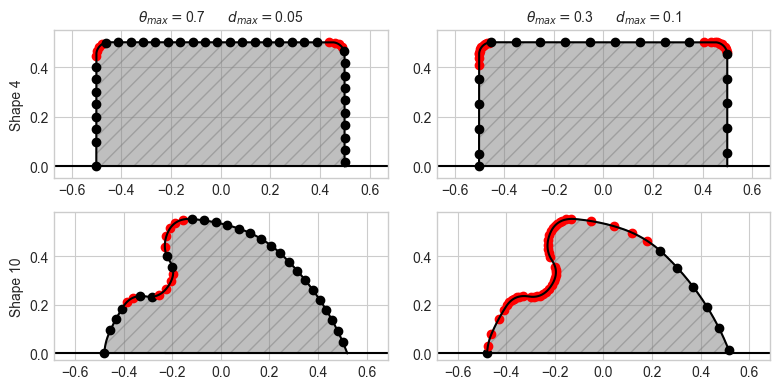

In [117]:
# ------------------------- discretisation ------------------

# Create a figure and axis
fig = plt.figure(figsize=(8, 4))
gs = gridspec.GridSpec(2,2)

for i, name in enumerate(['Shapes/S4.geo', 'Shapes/S10.geo']):
    for j, [dy, r_d] in enumerate(zip([0.05,0.1], [0.7,0.3])):
        ax = plt.subplot(gs[i,j])
        coor = md.load_shape(name)
        curv = md.curvature_line(coor, 0.01, 3, 500)
        ax.plot(coor[:,0], coor[:,1], 'k')
        ax.fill_between(coor[:,0],coor[:,1],np.zeros_like(coor[:,0]), color='gray',alpha = 0.5, hatch='//')
        ax.plot([-1,1],[0,0],'k')
        if i == 0:
             ax.set_title(r'$\theta_{max}=$'+f'{r_d}\t'+r'$d_{max}=$'+f'{dy}', fontsize=10)
        if j == 0:
             ax.set_ylabel(f'Shape {name[8:-4]:s}')
        # Calculate the angle between the lines
        #angle_rad = np.arctan2(line_end1[1] - point[1], line_end1[0] - point[0]) - np.arctan2(line_end2[1] - point[1], line_end2[0] - point[0])
        #angle_deg = np.degrees(angle_rad) % 360
        d_tot = coor[-1,2]
        #r_d = 0.5
        #dy = 0.05
        y = 0
        c = 'k'
        ax.set_aspect('equal', adjustable='datalim')
        ax.set_xlim(-0.6,0.6)
        while y < d_tot:
            point = np.array([ 
                    np.interp(y, coor[:,2], coor[:,0]),
                    np.interp(y, coor[:,2], coor[:,1])
                    ])
            ax.scatter(point[0], point[1], color=c)

            dr = min( md.distance_angle(curv, y, [r_d, -r_d]) )
            c = 'k'
            if dr/2 < dy:
                yd = dr/2
                c = 'r'
            y += yd
            if dy < dr/2:
                yd = dy
            

# Set aspect ratio to be equal, so the circle looks like a circle

plt.tight_layout()

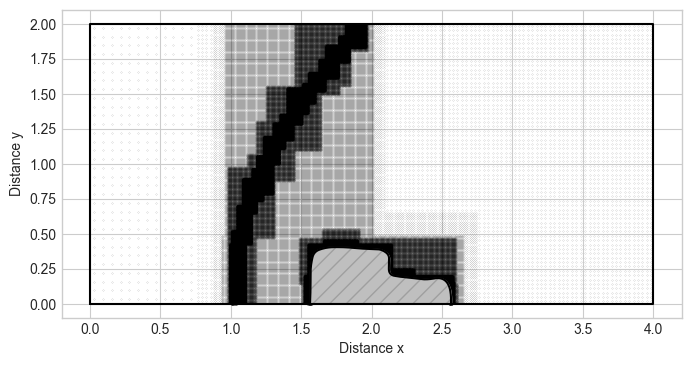

In [179]:
# -------------------------- mesh domain plot --------------------------------
fig,ax = plt.subplots(figsize=(8,4))
name = f'Data/Final_set/S0_C2'
coor = md.load_shape(name + '/shape')
#ds = md.load_data(f'Data/Final_set/S0_C2/plt/plt00027000/')
sd = ds.all_data()
ax.scatter(sd['x'], sd['y'], marker='.',c='k', s=0.015)
ax.plot([0,4,4,0,0],[0,0,2,2,0], 'k')
ax.set_xlabel('Distance x')
ax.set_ylabel('Distance y')
ax.plot(coor[:,0]+2, coor[:,1], 'k')
ax.fill_between(coor[:,0]+2,coor[:,1],np.zeros_like(coor[:,0]), color='white')
ax.fill_between(coor[:,0]+2,coor[:,1],np.zeros_like(coor[:,0]), color='gray',alpha = 0.5, hatch='//')


Text(0.5, 0, 'Distance along surface $\\zeta$')

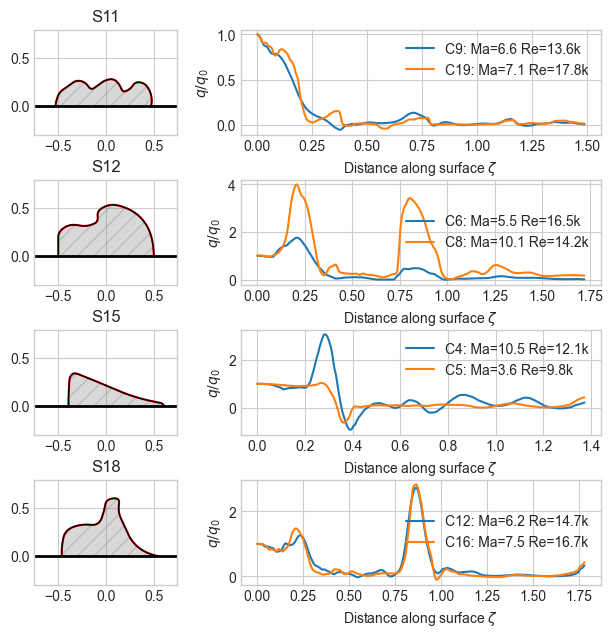

In [30]:
# -------------------------- Shape output ------------------------------------
n = 4
l = 1
fig, ax = plt.subplots(n, 2, figsize=(9, n*1.5))

error_list = list()
alt_list = list()
shapes = list()

for i, j in enumerate([11, 12, 15, 18]):#range(l,l+n):

    ax2 = ax[i][1]
    for k in range(20):
        if not os.path.isdir(f'Data/Final_set/S{j}_C{k}'): continue
        name = f'Data/Final_set/S{j}_C{k}'
        
        ax2.set_ylabel(r'${q}/{q_0}$')
        ax2.set_xlabel(r'Distance along surface $\zeta$')
        with open(name+'/input_file', 'r') as file:
            content = file.read()[:50]
        ma = float(content.split()[0])
        re = float(content.split()[1])
        output = np.load(name+'.npy')
        ax2.plot(output[:,0], output[:,1]/output[0,1], label = f'C{k}: Ma={ma:.1f} Re={re/1000:.1f}k')
        
    coor = md.load_shape(f'Data/Constant_set/S{j}/shape')
    # output = np.load(f'Data/Constant_set/S{j}.npy')
    # ax2.plot(output[:,0], output[:,1]/output[0,1], 'C5', label = r'$C\infty$: Ma=5.0 Re=7.5k')
    ax2.legend()#loc='center left', bbox_to_anchor=(1, 0.5)) 
    ax2.set_ylabel(r'${q}/{q_0}$')
    
    ax1 = ax[i][0]
    ax1.set_title(f'S{j}')
    ax1.plot(coor[:,0], coor[:,1], 'r')
    ax1.plot(coor[:,0], coor[:,1], 'k', linewidth=1)
    #ax1.set_yticklabels([])
    #ax1.set_xticklabels([])
    ax1.fill_between(coor[:,0], coor[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.3, hatch='//')
    ax1.plot([-1,1],[0,0], 'k', linewidth=2)
    ax1.set_ylim(-0.3, 0.8)
    ax1.set_xlim(-0.75,0.75)
    ax1.set_aspect('equal', adjustable='box')
    ax1.set_position([0.0, ((n-1)-i)/n, 0.2, (0.7/n)])
    ax2.set_position([0.25, ((n-1)-i)/n, 0.4, (0.7/n)])
ax2.set_xlabel(r'Distance along surface $\zeta$')       
#plt.tight_layout()

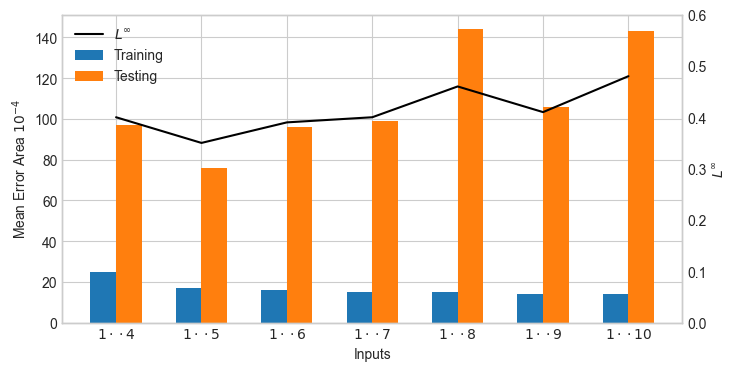

In [14]:
# --------------------------- input to result plot ---------------------------
# 001,Init20elu,20elu,_20elu,20elu,0123                  	25	97	0.40
# 002,Init20elu,20elu,_20elu,20elu,01234                 	17	76	0.35
# 003,Init20elu,20elu,_20elu,20elu,012345                	16	96	0.39
# 004,Init20elu,20elu,_20elu,20elu,0123456               	15	99	0.40
# 005,Init20elu,20elu,_20elu,20elu,01234567              	15	144	0.46
# 006,Init20elu,20elu,_20elu,20elu,012345678             	14	106	0.41
# 007,Init20elu,20elu,_20elu,20elu,0123456789            	14	143	0.48
fig, ax = plt.subplots(figsize=(8,4))
val = np.array([[25, 97, 0.4],[17,76,0.35],[16, 96, 0.39],[15,99,0.4],
                [15,144,0.46],[14,106,0.41],[14,143,0.48]])
x = np.arange(7)
names = [f'$1\cdot\cdot{i+1}$' for i in range(3,10)]
bar1 = ax.bar(x-0.15,val[:,0], width=0.3, label = 'Training')
bar2 = ax.bar(x+0.15, val[:,1], width=0.3, label='Testing')
ax.set_ylabel('Mean Error Area $10^{-4}$')
#ax.legend()
ax.set_xticks(x, names);
ax.set_xlabel('Inputs')
ax2 = ax.twinx()
plot1 = ax2.plot(x, val[:,2], 'k',label='$L^\infty$')
ax2.grid()
ax2.set_ylabel('$L^\infty$')
ax2.set_ylim(0,0.6)
ax.legend([plot1[0],bar1,bar2], [plot1[0].get_label(),*[bar.get_label() for bar in [bar1,bar2]]])

Text(0, 0.5, 'Mean absolute error $(L^1)$')

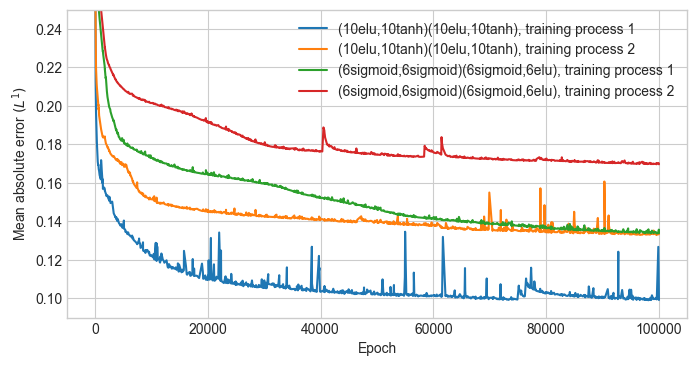

In [10]:
# ---------------- convergence ----------------------
##type1 = pd.read_csv('MachineLearning/logs/run-logs_Pri2m15sigmoid,15sigmoid,_12sigmoid,12elu,01234_1_train-tag-epoch_loss.csv')
#type2 = pd.read_csv('MachineLearning/logs/run-logs_Prim15sigmoid,15sigmoid,_12sigmoid,12elu,01234_1_train-tag-epoch_loss.csv')
val1 = pd.read_csv('MachineLearning/logs/Prim10elu,10tanh,_10elu,10tanh,01234_3.csv')
val2 = pd.read_csv('MachineLearning/logs/Prim10elu,10tanh,_10elu,10tanh,01234_4.csv')
val3 = pd.read_csv('MachineLearning/logs/Prim6sigmoid,6sigmoid,_6sigmoid,6elu,01234_3.csv')
val4 = pd.read_csv('MachineLearning/logs/Prim6sigmoid,6sigmoid,_6sigmoid,6elu,01234_4.csv')

fig, ax = plt.subplots(figsize=(8,4))
def plotax(val, label):
    ax.plot(val['Step'],val['Value'],label =label)
plotax(val1, '(10elu,10tanh)(10elu,10tanh), training process 1')
plotax(val2, '(10elu,10tanh)(10elu,10tanh), training process 2')
plotax(val3, '(6sigmoid,6sigmoid)(6sigmoid,6elu), training process 1')
plotax(val4, '(6sigmoid,6sigmoid)(6sigmoid,6elu), training process 2')

#ax.plot(type1['Step'],type1['Value'], label = 'Condition type 1')
#ax.plot(type2['Step'],type2['Value'], label = 'Condition type 2')
#ax.set_yscale('log')
ax.set_ylim(0.09, 0.25)
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean absolute error $(L^1)$')

Text(0, 0.5, 'Mean absolute error $(L^1)$')

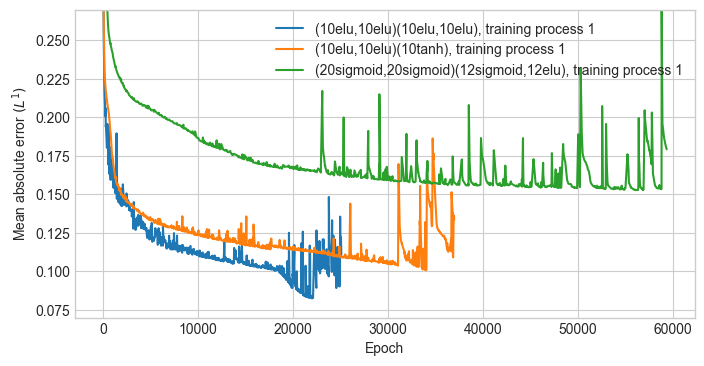

In [15]:
# ---------------- convergence 2 ----------------------
##type1 = pd.read_csv('MachineLearning/logs/run-logs_Pri2m15sigmoid,15sigmoid,_12sigmoid,12elu,01234_1_train-tag-epoch_loss.csv')
#type2 = pd.read_csv('MachineLearning/logs/run-logs_Prim15sigmoid,15sigmoid,_12sigmoid,12elu,01234_1_train-tag-epoch_loss.csv')
val1 = pd.read_csv('MachineLearning/logs/OLDPrim10elu,10elu,_10elu,10elu,012345678_4.csv')
val2 = pd.read_csv('MachineLearning/logs/OLDPrim10elu,10elu,_10tanh,01234_2.csv')
val3 = pd.read_csv('MachineLearning/logs/OLDPrim20sigmoid,20sigmoid,_12sigmoid,12elu,01234_2.csv')

fig, ax = plt.subplots(figsize=(8,4))
def plotax(val, label):
    ax.plot(val['Step'],val['Value'],label =label)
plotax(val1, '(10elu,10elu)(10elu,10elu), training process 1')
plotax(val2, '(10elu,10elu)(10tanh), training process 1')
plotax(val3, '(20sigmoid,20sigmoid)(12sigmoid,12elu), training process 1')

#ax.plot(type1['Step'],type1['Value'], label = 'Condition type 1')
#ax.plot(type2['Step'],type2['Value'], label = 'Condition type 2')
#ax.set_yscale('log')
ax.set_ylim(0.07, 0.27)
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean absolute error $(L^1)$')

Text(0, 0.5, 'Mean absolute error $(L^1)$')

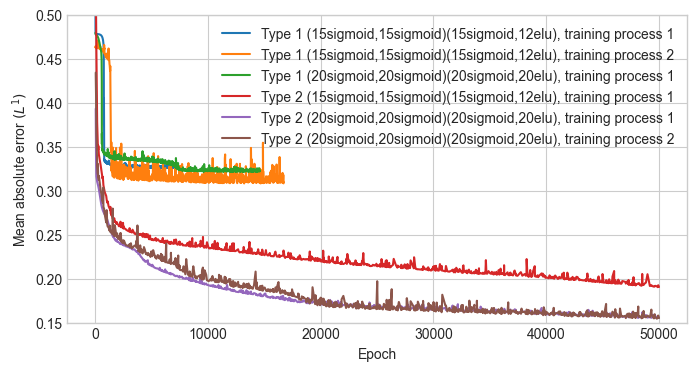

In [20]:
# ---------------- convergence 2 ----------------------
val1 = pd.read_csv('MachineLearning/logs/1Pri2m15sigmoid,15sigmoid,_12sigmoid,12elu,01234_1.csv')
val2 = pd.read_csv('MachineLearning/logs/1Pri2m15sigmoid,15sigmoid,_12sigmoid,12elu,01234_2.csv')
val3 = pd.read_csv('MachineLearning/logs/1Pri2m20sigmoid,20sigmoid,_20sigmoid,20elu,01234_2.csv')

val4 = pd.read_csv('MachineLearning/logs/1Prim15sigmoid,15sigmoid,_12sigmoid,12elu,01234_1.csv')
val5 = pd.read_csv('MachineLearning/logs/1Prim20sigmoid,20sigmoid,_20sigmoid,20elu,01234_1.csv')
val6 = pd.read_csv('MachineLearning/logs/1Prim20sigmoid,20sigmoid,_20sigmoid,20elu,01234_2.csv')

fig, ax = plt.subplots(figsize=(8,4))
def plotax(val, label):
    ax.plot(val['Step'],val['Value'],label =label)
plotax(val1, 'Type 1 (15sigmoid,15sigmoid)(15sigmoid,12elu), training process 1')
plotax(val2, 'Type 1 (15sigmoid,15sigmoid)(15sigmoid,12elu), training process 2')
plotax(val3, 'Type 1 (20sigmoid,20sigmoid)(20sigmoid,20elu), training process 1')
plotax(val4, 'Type 2 (15sigmoid,15sigmoid)(15sigmoid,12elu), training process 1')
plotax(val5, 'Type 2 (20sigmoid,20sigmoid)(20sigmoid,20elu), training process 1')
plotax(val6, 'Type 2 (20sigmoid,20sigmoid)(20sigmoid,20elu), training process 2')
#ax.plot(type1['Step'],type1['Value'], label = 'Condition type 1')
#ax.plot(type2['Step'],type2['Value'], label = 'Condition type 2')
#ax.set_yscale('log')
ax.set_ylim(0.15, 0.5)
ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean absolute error $(L^1)$')

L1 = 0.06557945283663426
Linf = 0.2950032492122868
Lee L1 = 0.14967547639061876
Lee Linf = 0.4867553897343813
Det L1 = 0.10276239742420688
Det Linf = 0.3651858908252678


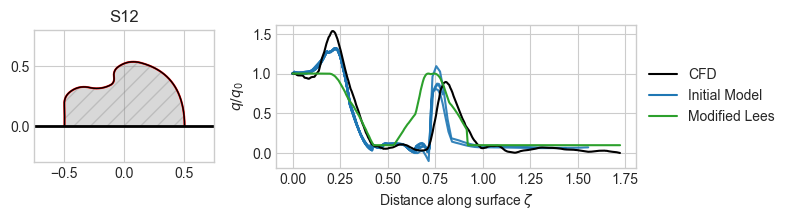

In [153]:
# ---------------------------- initial model result -------------------------------------
# ---------------------------- load model -----------------------------------------
import tensorflow as tf

structure = [0,1,2,3,4]
test_id1 = [3, 5, 12, 17]
test_id2 = [2, 11, 20, 26]
test_id3 = [4, 16, 22, 30]
tests = [*test_id1, *test_id2,*test_id3]
tests.sort()
plttest = [12]
n = len(plttest)
fig = plt.figure(figsize=(8, n*2.2))
gs = gridspec.GridSpec(n,2, width_ratios=(2,4))

model  = tf.keras.models.load_model('MachineLearning/Initial_model.h5')
model2 = tf.keras.models.load_model('MachineLearning/Initial_model_2.h5')
model3 = tf.keras.models.load_model('MachineLearning/Initial_model_3.h5')



with open('MachineLearning/training_data', 'rb') as file:
    data_set = pickle.load(file)

L1_error = list()
Linf_error = list()
Lee_L1 = list()
Lee_Linf = list()
Det_L1 = list()
Det_Linf = list()
for set in data_set:
    if set.shape == 14: continue
    if set.shape in tests:
        if set.shape in test_id1:
            y = model.predict(set.input[:,structure].reshape([1,80,5]), verbose=0)
        elif set.shape in test_id2:
            y = model2.predict(set.input[:,structure].reshape([1,80,5]), verbose=0)
        elif set.shape in test_id3:
            y = model3.predict(set.input[:,structure].reshape([1,80,5]), verbose=0)

        L1_error.append( (abs(set.output[1:] -  y[0,:])* set.input[1:,1]).sum()  )
        Linf_error.append( max(abs(set.output[1:] -  y[0,:])))
        if set.shape in plttest:
            ax2 = plt.subplot(gs[plttest.index(set.shape)*2+1])
            ax2.plot(set.input[:,0],[1,*y[0,:]], 'C0', alpha = 0.9)


        # Lees error calc
        a = set.input[1:,2]
        a[a>np.pi/2] = np.pi/2
        c = 0.1 + 0.9 * np.cos(a)
        d = np.cos(a)**2
        Lee_L1.append(  (abs( set.output[1:] - c )* set.input[1:,1]).sum()   )
        Lee_Linf.append( max(abs(set.output[1:] - c)))
        Det_L1.append(  (abs( set.output[1:] - d )* set.input[1:,1]).sum()   )
        Det_Linf.append( max(abs(set.output[1:] - d)))


print(f'L1 = {np.array(L1_error).mean()}' )
print(f'Linf = {np.array(Linf_error).mean()}')
print(f'Lee L1 = {np.array(Lee_L1).mean()}' )
print(f'Lee Linf = {np.array(Lee_Linf).mean()}')
print(f'Det L1 = {np.array(Det_L1).mean()}' )
print(f'Det Linf = {np.array(Det_Linf).mean()}')

for test in plttest:
    j = plttest.index(test)
    if test == 20:
        test = 34
    ax2 = plt.subplot(gs[j*2+1])
    ax1 = plt.subplot(gs[j*2])
    filename = f'Data/Constant_set/S{test}'
    outputs = np.load(filename+'.npy')
    ax2.plot(outputs[:,0], outputs[:,1]/outputs[0,1], 'k', label = 'CFD')
    ax2.set_xlabel('')
    coor = md.load_shape(filename+'/shape')
    
    ax1.set_title(f'S{test}')
    ax1.plot(coor[:,0], coor[:,1], 'r')
    ax1.plot(coor[:,0], coor[:,1], 'k', linewidth=1)
    ax1.fill_between(coor[:,0], coor[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.3, hatch='//')
    ax1.plot([-1,1],[0,0], 'k', linewidth=2)
    ax1.set_ylim(-0.3, 0.8)
    ax1.set_xlim(-0.75,0.75)
    ax1.set_aspect('equal', adjustable='box')

    curv = md.curvature_line(coor,0.01,2,300)
    a = curv[:,2]
    a[a>np.pi/2] = np.pi/2
    a[160:] = np.pi/2
    a[a<-0.3] = np.pi/2
    #a[a<0] = np.pi/2
    c = 0.1 + 0.9 * np.cos(a)
    d = np.cos(a)**2
    ax2.plot([],[],'C0', label = 'Initial Model')
    ax2.plot(curv[:,0], c[:], 'C2', label = 'Modified Lees')
    #ax2.plot(curv[:,0], d[:], 'C1', label = 'Detra & Hidalgo')
    ax2.set_ylabel(r'${q}/{q_0}$')
    ax2.set_xlabel(r'Distance along surface $\zeta$')
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    #ax2.set_xlim(-0.01,1)


# lines, labels = fig.axes[0].get_legend_handles_labels()
# fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0)) 
plt.tight_layout()

L1 = 0.14831540874779356
Linf = 0.8930620074225645
Lee L1 = 0.18973741383867362
Lee Linf = 0.8566942226619825
Det L1 = 0.15370266704019983
Det Linf = 0.7654483270489246


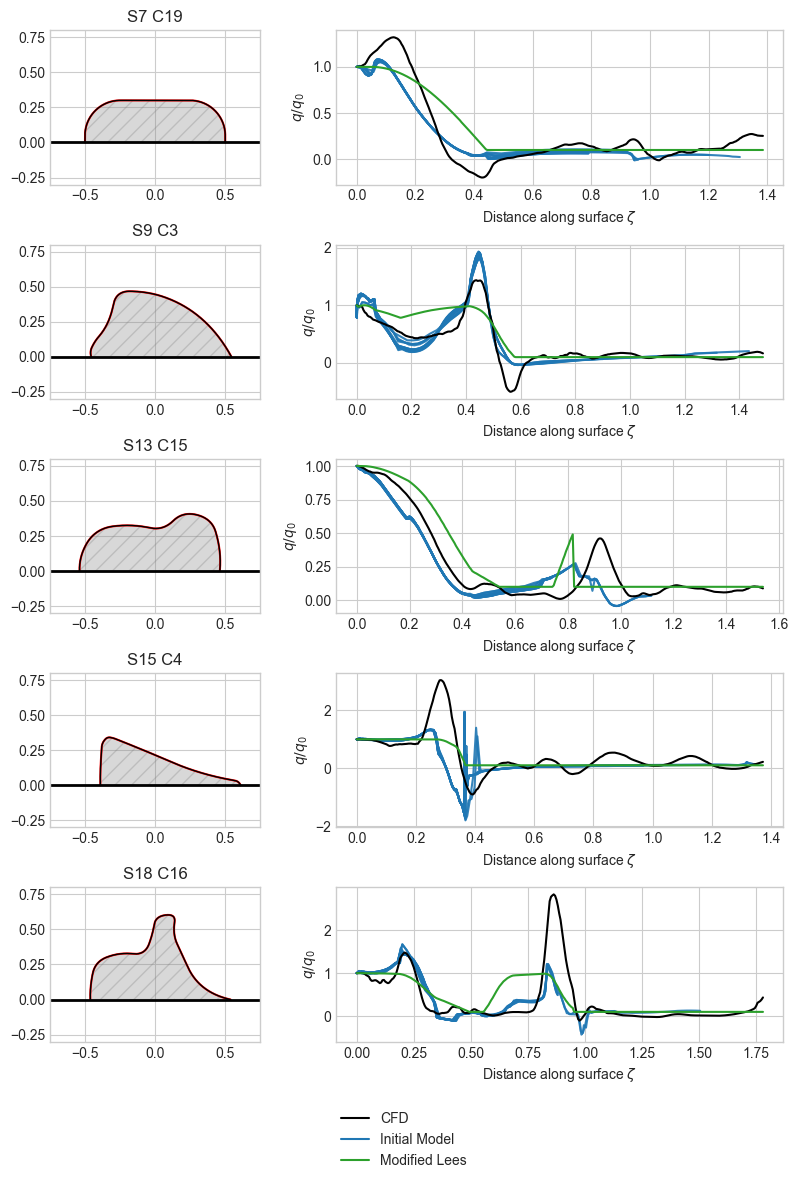

In [75]:
# ------------------------------ final model result -----------------------------------------
# ---------------------------- load model -----------------------------------------
import tensorflow as tf

structure = [0,1,2,3,4]
test_id1 = np.array([[4, 10], [1, 1], [9, 3], [2, 0]])
test_id2 = np.array([[5, 4], [7, 19], [12, 6], [13, 15]])
test_id3 = np.array([[10, 13], [11, 19], [18, 16], [15, 4]])
tests = np.array([*test_id1, *test_id2,*test_id3])
tests = tests[tests[:, 0].argsort()]
plttest = np.array([[7,19], [9,3], [13,15], [15,4], [18,16]])  #[1, 1], [4, 10], [5, 4]
n = len(plttest)
fig = plt.figure(figsize=(8, n*2.2))
gs = gridspec.GridSpec(n,2, width_ratios=(2,4))

# model  = tf.keras.models.load_model('MachineLearning/Primary_model0.h5')
# model2 = tf.keras.models.load_model('MachineLearning/Primary_model1.h5')
# model3 = tf.keras.models.load_model('MachineLearning/Primary_model2.h5')



with open('MachineLearning/training_data_primary', 'rb') as file:
    data_set = pickle.load(file)

L1_error = list()
Linf_error = list()
Lee_L1 = list()
Lee_Linf = list()
Det_L1 = list()
Det_Linf = list()
for set in data_set:
    if set.shape == 14: continue
    
    if set.shape in tests[:,0]:
        if not tests[np.where(tests[:,0] == set.shape),1] == set.case: continue
        input_set = np.zeros((set.input.shape[0]+1,len(structure)))
        input_set[0,:4] = set.flow
        input_set[1:,:] = set.input[:,structure]

        if set.shape in test_id1[:,0]:
            y = model.predict(input_set.reshape([1,81,5]), verbose=0)
        elif set.shape in test_id2[:,0]:
            y = model2.predict(input_set.reshape([1,81,5]), verbose=0)
        elif set.shape in test_id3[:,0]:
            y = model3.predict(input_set.reshape([1,81,5]), verbose=0)

        L1_error.append( (abs(set.output[1:] -  y[0,:])* set.input[1:,1]).sum()  )
        Linf_error.append( max(abs(set.output[1:] -  y[0,:])))
        
        if set.shape in plttest[:,0]:
            j = np.where(plttest[:,0] == set.shape)[0][0]
            ax1 = plt.subplot(gs[j*2])
            ax2 = plt.subplot(gs[j*2+1])
            ax2.plot(set.input[:,0],[1,*y[0,:]], 'C0', alpha = 0.9)
            if set.case == 0:
                set.case = 20
            ax1.set_title(f'S{set.shape} C{set.case}')
        # Lees error calc
        a = set.input[1:,2]
        a[a>np.pi/2] = np.pi/2
        c = 0.1 + 0.9 * np.cos(a)
        d = np.cos(a)**2
        Lee_L1.append(  (abs( set.output[1:] - c )* set.input[1:,1]).sum()   )
        Lee_Linf.append( max(abs(set.output[1:] - c)))
        Det_L1.append(  (abs( set.output[1:] - d )* set.input[1:,1]).sum()   )
        Det_Linf.append( max(abs(set.output[1:] - d)))


print(f'L1 = {np.array(L1_error).mean()}' )
print(f'Linf = {np.array(Linf_error).mean()}')
print(f'Lee L1 = {np.array(Lee_L1).mean()}' )
print(f'Lee Linf = {np.array(Lee_Linf).mean()}')
print(f'Det L1 = {np.array(Det_L1).mean()}' )
print(f'Det Linf = {np.array(Det_Linf).mean()}')

for test in plttest:
    j = np.where(plttest[:,0] == test[0])[0][0]
    ax2 = plt.subplot(gs[j*2+1])
    ax1 = plt.subplot(gs[j*2])
    filename = f'Data/Final_set/S{test[0]}_C{test[1]}'
    outputs = np.load(filename+'.npy')
    ax2.plot(outputs[:,0], outputs[:,1]/outputs[0,1], 'k', label = 'CFD')
    ax2.set_xlabel('')
    coor = md.load_shape(filename+'/shape')
    ax1.plot(coor[:,0], coor[:,1], 'r')
    ax1.plot(coor[:,0], coor[:,1], 'k', linewidth=1)
    ax1.fill_between(coor[:,0], coor[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.3, hatch='//')
    ax1.plot([-1,1],[0,0], 'k', linewidth=2)
    ax1.set_ylim(-0.3, 0.8)
    ax1.set_xlim(-0.75,0.75)
    ax1.set_aspect('equal', adjustable='box')

    curv = md.curvature_line(coor,0.01,2,300)
    a = curv[:,2]
    a[a>np.pi/2] = np.pi/2
    a[160:] = np.pi/2
    #a[a<0] = np.pi/2
    c = 0.1 + 0.9 * np.cos(a)
    d = np.cos(a)**2
    ax2.plot([],[],'C0', label = 'Initial Model')
    ax2.plot(curv[:,0], c[:], 'C2', label = 'Modified Lees')
    #ax2.plot(curv[:,0], d[:], 'C1', label = 'Detra & Hidalgo')
    ax2.set_ylabel(r'${q}/{q_0}$')
    ax2.set_xlabel(r'Distance along surface $\zeta$')
    #ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    #ax2.set_xlim(-0.01,1)


lines, labels = fig.axes[1].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0)) 
plt.tight_layout()

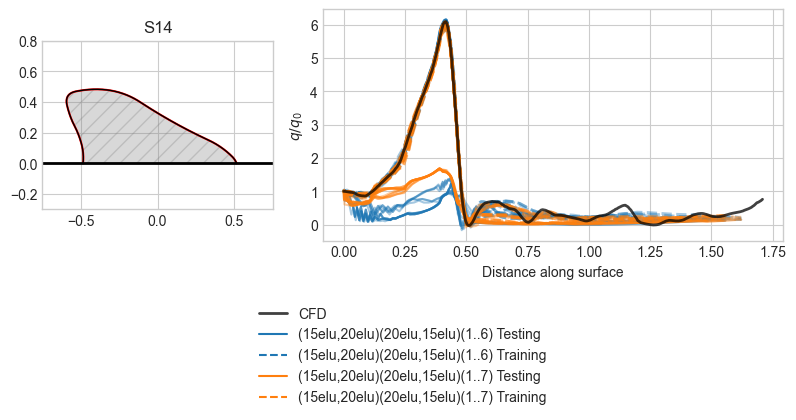

In [21]:
# ------------------------------- Plot s14 --------------------------------------
filename_list = ['MachineLearning/outputs/S_14Init15elu,20elu,_20elu,15elu,012345',
            'MachineLearning/outputs/S_14Init15elu,20elu,_20elu,15elu,0123456']
n = 1
fig = plt.figure(figsize=(8, n*3))
gs = gridspec.GridSpec(n,2, width_ratios=(2,4))
shape = 14
pos = np.array((0,0))
if shape == 14: pos = np.array((-0.15,0))
coor = md.load_shape(f'Data/Constant_set/S{shape}/shape',pos)
output = np.load(f'Data/Constant_set/S14.npy')
ax2 = plt.subplot(gs[1])

#ax2.plot(output[:,0], output[:,1]/output[0,1], 'k', linewidth = 7, alpha = 0.5)
ax2.set_ylabel(r'${q}/{q_0}$')
ax2.set_xlabel('Distance along surface')
ax1 = plt.subplot(gs[0])
ax1.set_title(f'S{shape}')
ax1.plot(coor[:,0], coor[:,1], 'r')
ax1.plot(coor[:,0], coor[:,1], 'k', linewidth=1)
ax1.fill_between(coor[:,0], coor[:,1],np.zeros_like(coor[:,0]),color='gray',alpha = 0.3, hatch='//')
#ax1.axis('equal')
ax1.plot([-0.75,0.75],[0,0], 'k', linewidth=2)
ax1.set_ylim(-0.3, 0.8)
ax1.set_xlim(-0.75,0.75)
ax1.set_aspect('equal', adjustable='box')
outputs = np.load(f'Data/Constant_set/S{shape}.npy')

for k, filename in enumerate(filename_list):
    shapes=list()
    with open(filename, 'rb') as file:
        for predict_sets in  pickle.load(file):
            [test_set, train_set] = predict_sets
            for set in test_set:
                if set.shape != 14: continue
                # Prediction
                ax2.plot(set.input[:,0], [1, *set.predict],f'C{k}', alpha = 0.4)
                #ax2.plot(set.input[1:,0], c, 'C3',linewidth = 1)
            for set in train_set:
                if set.shape != 14: continue
                ax2.plot(set.input[:,0], [1, *set.predict],f'--C{k}', alpha = 0.4, linewidth = 2)
                #ax2.plot(set.input[1:,0], c, 'C3',linewidth = 1)
        

#ax2 = plt.subplot(gs[i*2+1])
#ax2.plot(outputs[:,0], outputs[:,1]/outputs[0,1], 'k')

ax2.plot(output[:,0], output[:,1]/output[0,1], 'k', label = 'CFD', linewidth = 2, alpha = 0.75)
# for i in range(n):
#     ax2 = plt.subplot(gs[i*2+1])
#     for k, name in enumerate(filename_list):
#         pattern = r'(\d+[a-zA-Z]+(?:,\d+[a-zA-Z]+)*)'
#         matches = re.findall(pattern, name)
#         parts = name.split(',')
#         result = parts[-1].strip()
ax2.plot([],[], f'C0', label='(15elu,20elu)(20elu,15elu)(1..6) Testing')
ax2.plot([],[], f'--C0',label='(15elu,20elu)(20elu,15elu)(1..6) Training')
ax2.plot([],[], f'C1', label='(15elu,20elu)(20elu,15elu)(1..7) Testing')
ax2.plot([],[], f'--C1',label='(15elu,20elu)(20elu,15elu)(1..7) Training')
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0))    
plt.tight_layout()

Text(0.5, 0, 'Distance along surface $\\zeta$')

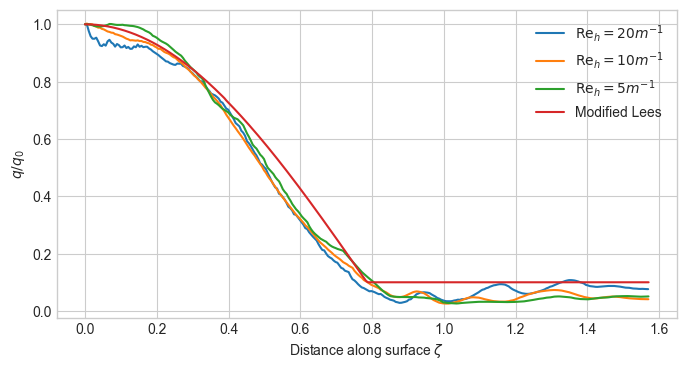

In [36]:
# ------------------------------- Mesh refinement ---------------------------------------
l5 = np.load('Data/Mesh_refinement/S1_l5.npy')
l6 = np.load('Data/Mesh_refinement/S1_l6.npy')
l7 = np.load('Data/Mesh_refinement/S1_l7.npy')
curv = md.curvature_line(md.load_shape('Data/Mesh_refinement/S1_l5/shape'),0.01,1,300)
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(l5[:,0], l5[:,1]/l5[0,1], label = '$\mathrm{Re}_h=20 m^{-1}$')
ax.plot(l6[:,0], l6[:,1]/l6[0,1], label = '$\mathrm{Re}_h=10m^{-1}$')
ax.plot(l7[:,0], l7[:,1]/l7[0,1], label = '$\mathrm{Re}_h=5m^{-1}$')
#ax.plot(curv[:,0], np.cos(curv[:,2]/2) ** 5.27, label = 'Kemp, Rose & Detra' )
a = curv[:,2]
a[a>np.pi/2] = np.pi/2
ax.plot(curv[:,0], 0.1 + 0.9 * np.cos(a), label = 'Modified Lees' )
ax.legend()
ax.set_ylabel(r'${q}/{q_0}$')
ax.set_xlabel(r'Distance along surface $\zeta$')